In [170]:
%matplotlib inline
import h5pyd as h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [171]:
#domain = "/home/john/NEX/tasmax_amon_BCSD_historical_r1i1p1_CONUS_CSIRO-Mk3-6-0_199001-199412.nc"
domain = "/home/john/NEX/tasmax_day_BCSD_rcp45_r1i1p1_CanESM2_2050.nc"

In [172]:
endpoint = "http://35.166.11.248:5101"

In [173]:
f = h5py.File(domain, 'r', endpoint=endpoint)

In [174]:
f.attrs["experiment"]

b'RCP4.5'

In [175]:
dset = f["/tasmax"]

In [176]:
dset.shape

(365, 720, 1440)

In [177]:
dset.dtype

dtype('float32')

In [178]:
data = dset[0,:,:]

In [179]:
dset.chunks

[2, 180, 720]

In [180]:
dset.fillvalue

1.0000000200408773e+20

In [181]:
data.shape

(720, 1440)

In [182]:
np.min(data)

218.93906

In [183]:
np.max(data)

1e+20

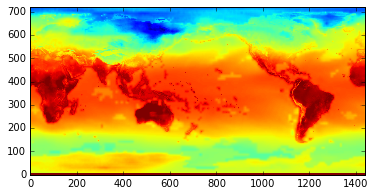

In [184]:
plt.imshow(np.clip(data, 210, 310), origin='lower')

In [185]:
# zoom into a smaller area
sample = dset[6, 150:350, 400:700]

In [186]:
sample.shape

(200, 300)

In [187]:
np.min(sample)

266.33868

In [188]:
np.max(sample)

317.42093

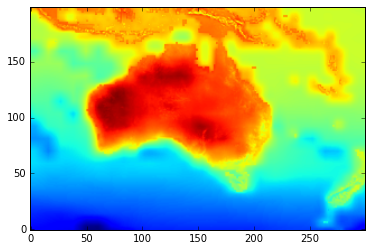

In [189]:
plt.imshow(np.clip(sample, 200, 320), origin='lower')

In [190]:
time_series = dset[:, 180, 50]

In [191]:
time_series.shape

(365,)

In [192]:
np.min(time_series)

267.42502

In [193]:
np.max(time_series)

279.35629

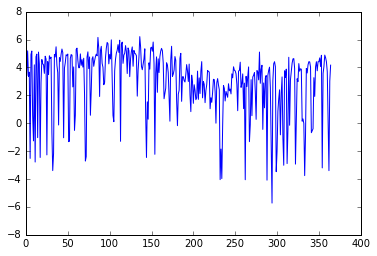

In [196]:
t = np.arange(0, 365, 1)
plt.plot(t, time_series)
plt.ylim((-8, 8))
plt.show()

In [ ]:
time_series